In [ ]:
from ovito.io import import_file, export_file
from ovito.modifiers import BondAnalysisModifier, CreateBondsModifier
import os
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def bondAnalysis(file):
    try: 
        pipeline = import_file(os.path.join(iroot,f))
        
        numframes=pipeline.source.num_frames
    
        pipeline.modifiers.append(CreateBondsModifier(cutoff = 2))
        pipeline.modifiers.append(BondAnalysisModifier(partition=BondAnalysisModifier.Partition.ByParticleType,bins = 200))
        
        # Export bond angle distribution to an output text file.
        #export_file(pipeline, 'output/bond_angles.txt', 'txt/table', key='bond-angle-distr', end_frame=1)

        # Convert bond length histogram to a NumPy array and print it to the terminal.
        data = pipeline.compute(numframes-1)
    except:
        i=1
        
    if numframes < 20:
        continue
    print(d + ' with '+str(numframes)+' frames.')
    # if np.isclose(peakLen,realLen,atol=errLen) and np.isclose(peakAngle,realAngle,atol=errAng):


    
    
    angleTables=data.tables['bond-angle-distr'].xy()
    angleTypes=data.tables['bond-angle-distr'].y
    angleBins = angleTables[:,0]
    
    for column, name in enumerate(angleTypes.component_names):
        if name != 'Si-O-Si' and name != 'O-Si-O':
            continue
        
        angleCounts=angleTypes[:,column]
        
        peakAngle=angleBins[np.argmax(angleCounts)]
        angTitle= "Angle distribution for bond types:{} with a max angle of {:.1f}".format(name,peakAngle)
        plt.bar(angleBins,angleCounts)
        plt.title(angTitle)
        plt.xlabel('Angle(Degrees)')
        plt.ylabel('Count')
        plt.show()
    
    
    lenTables=data.tables['bond-length-distr'].xy()
    bondTypes=data.tables['bond-length-distr'].y
    bondBins=lenTables[:,0]
    
    for column, name in enumerate(bondTypes.component_names):
        # if name != 'Si-O-Si' and name != 'O-Si-O':
        #     continue
        bondCounts=bondTypes[:,column]

        peakLen=bondBins[np.argmax(bondCounts)]
        lenTitle= "Bond length distribution for bond types:{} with peak at {:.2f}".format(name,peakLen)
        
        
        # max_y_lim = max(counts) + 500
        # print(max_y_lim)
        # min_y_lim = min(counts)
        
        # plt.ylim(min_y_lim, max_y_lim)
        plt.title(lenTitle)
        plt.xlabel('Length(r’$\AA$’')
        plt.bar(bondBins,bondCounts)
        plt.show()

SilicaAnneal0917-FARM-120711 with 211 frames.


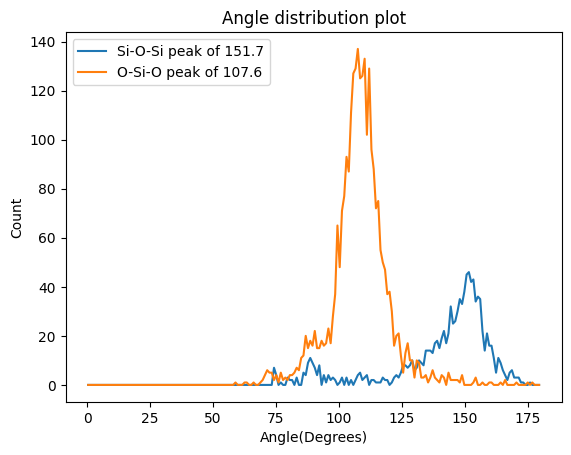

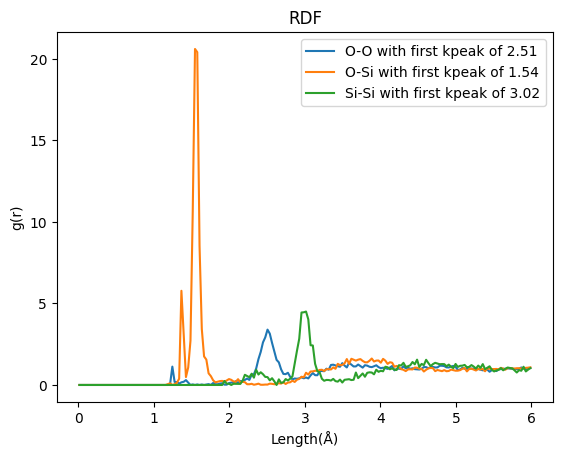

SilicaNVTData with 132 frames.


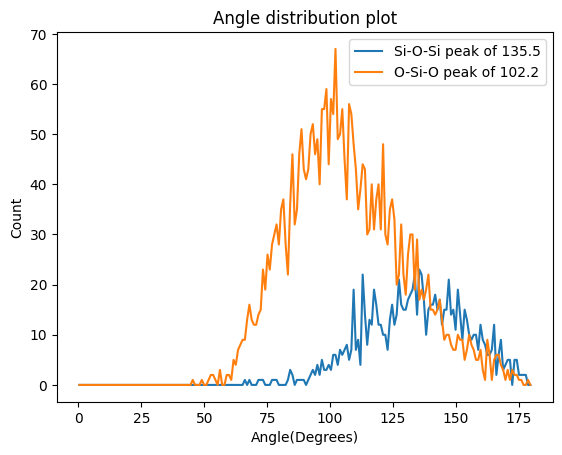

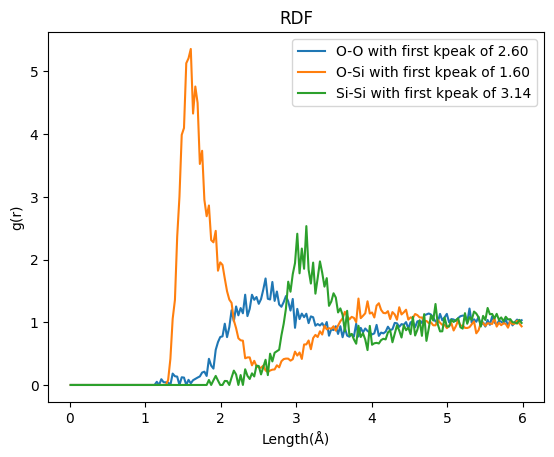

SilicaAttemptDeform with 101 frames.


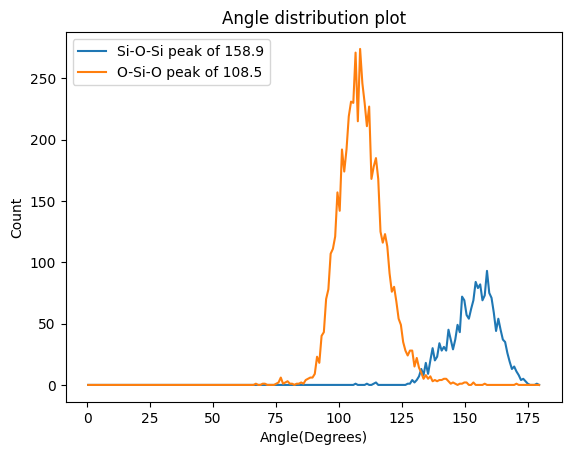

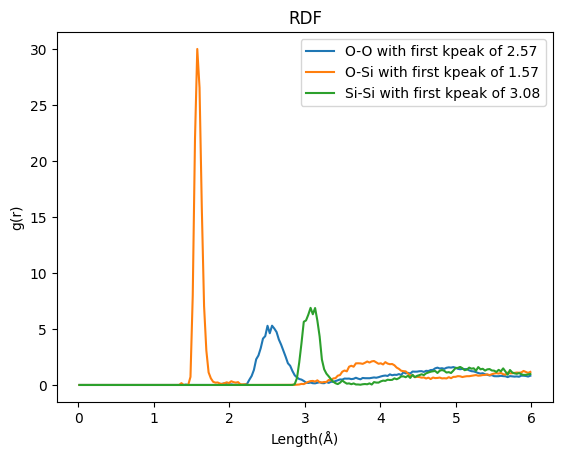

In [17]:
from ovito.io import import_file, export_file
from ovito.modifiers import BondAnalysisModifier, CreateBondsModifier, CoordinationAnalysisModifier
import os
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks


folder='/home/agoga/topcon/output-save/'

realLen=1.6
realAngle = 144
errLen=.1
errAng = 100

for root, dirs,files in os.walk(folder):
    for d in dirs:        
       if not d.startswith('CreateAmorphSiO2') and not d.startswith('Silica'):
           continue
       for iroot, idirs, ifiles in os.walk(os.path.join(root+d)):
            for f in ifiles:
                peakLen=0
                peakAngle=0
                peaksAng=0
                if not f.endswith('.dump'):
                    continue
                os.path.join(iroot,f)
                # Set up data pipeline:
                try: 
                    pipeline = import_file(os.path.join(iroot,f))
                    
                    numframes=pipeline.source.num_frames


                    pipeline.modifiers.append(CoordinationAnalysisModifier(cutoff=6, partial=True))
                    pipeline.modifiers.append(CreateBondsModifier(cutoff = 2))
                    pipeline.modifiers.append(BondAnalysisModifier(partition=BondAnalysisModifier.Partition.ByParticleType,bins = 200))
                    
                    # Export bond angle distribution to an output text file.
                    #export_file(pipeline, 'output/bond_angles.txt', 'txt/table', key='bond-angle-distr', end_frame=1)

                    # Convert bond length histogram to a NumPy array and print it to the terminal.
                    data = pipeline.compute(numframes-1)
                except:
                    i=1
                    
                if numframes < 20:
                    continue
                print(d + ' with '+str(numframes)+' frames.')
                # if np.isclose(peakLen,realLen,atol=errLen) and np.isclose(peakAngle,realAngle,atol=errAng):


                
                
                angleTables=data.tables['bond-angle-distr'].xy()
                angleTypes=data.tables['bond-angle-distr'].y
                angleBins = angleTables[:,0]
                
                for column, name in enumerate(angleTypes.component_names):
                    if name != 'Si-O-Si' and name != 'O-Si-O':
                        continue
                    
                    angleCounts=angleTypes[:,column]
                    
                    peakAngle=angleBins[np.argmax(angleCounts)]
                    
                    if peakAngle < 1:
                        continue
                    lab="{} peak of {:.1f}".format(name,peakAngle)
                    plt.plot(angleBins,angleCounts,label=lab) 
                    
                plt.legend(loc=0)
                plt.title("Angle distribution plot")
                plt.xlabel('Angle(Degrees)')
                plt.ylabel('Count')  
                plt.show()
                
                lenTables=data.tables['coordination-rdf'].xy()
                bondTypes=data.tables['coordination-rdf'].y
                rdfTable=data.tables['coordination-rdf'].xy()
                bondBins=lenTables[:,0]
                
                for column, name in enumerate(bondTypes.component_names):

                    bondCounts=bondTypes[:,column]

                    peakLen=bondBins[np.argmax(bondCounts)]
                    lab= "{} with first peak of {:.2f}".format(name,peakLen)
                    
                    if peakLen < 1:
                        continue
                        
                    plt.plot(bondBins,bondCounts, label=lab)
                    # max_y_lim = max(counts) + 500
                    # print(max_y_lim)
                    # min_y_lim = min(counts)
                    
                    # plt.ylim(min_y_lim, max_y_lim)
                plt.title("RDF")
                plt.xlabel('Length(Å)')
                plt.ylabel("g(r)")
                plt.legend(loc=0)
                plt.show()                    
                
       

